# Task 1

## Question 1

Conduct an appropriate exploratory analysis on the house priced, for all houses.
Discuss any cleaning of the data you did, including why and how you did it, or why you
didn’t do it. Explore the distribution of the houses in the two subgroups, waterfront
and not.

In [2]:
# Import all the usual suspects
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminary data cleaning

In [3]:
# Load in the data
house = pd.read_csv('house_data_2024.csv')

# Print the first 10 observations
house.head(10)

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
0,1,221900,3,1.00,109.624675,524.897807,0
1,2,538000,3,2.25,238.758826,672.798216,0
2,3,180000,2,1.00,71.534745,929.022668,0
3,4,604000,4,3.00,182.088443,464.511334,0
4,5,510000,3,2.00,156.075808,750.650316,0
5,6,1225000,4,4.50,503.530286,9469.528056,0
6,7,257500,3,2.25,159.327388,633.500557,0
7,8,291850,3,1.50,98.476403,902.173913,0
8,9,229500,3,1.00,165.366035,693.979933,0
9,10,323000,3,2.50,175.585284,609.438870,0


In [4]:
# Investigate the number of observations and number of columns of the dataset
house.shape

(21601, 7)

In [5]:
# We check for duplicate values and delete duplicated rows 
house.drop_duplicates()
house.shape

(21601, 7)

After dropping the duplicated rows with drop_duplicates( ), we can see that the number of rows stay the same. This means that our dataset does not have any duplicated values. 

### Data Types

First, we check the types of each column in our dataset:

In [5]:
house.dtypes

id              int64
price           int64
bedrooms        int64
bathrooms     float64
sqm_living    float64
sqm_lot       float64
waterfront      int64
dtype: object

Now, we check the data type of each column: 
- id: The data type of this column is suppose to be an object instead of an interger
- price: The price of each house is suppose to be a float instead of an interger
- bedrooms: Interger is the correct data type for the number of bedrooms
- bathrooms: The number of bedrooms is suppose to be an interger instead of a float
- sqm_living: Float is the correct data type for square meters of the living room
- sqm_lot: Float is the correct data type for square meters of the parking lot
- waterfront: The waterfront data should be an object: 0 for No waterfront and 1 for Waterfront

Hence, we need to change the data type for the columns id, price, bathrooms, and waterfront:

In [8]:
house['id'] = house['id'].astype("object")

house['price'] = house['price'].astype("float64")

house['bathrooms'] = house['bathrooms'].astype("int64")

house['waterfront'] = house['waterfront'].astype("object")

Now, we inspect the data types again.

In [9]:
house.dtypes

id             object
price         float64
bedrooms        int64
bathrooms       int64
sqm_living    float64
sqm_lot       float64
waterfront     object
dtype: object

The data types are now correct. Then, we can inspect the dataset again to check if the data types are appropriate

In [10]:
house.head(10)

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
0,1,221900.0,3,1,109.624675,524.897807,0
1,2,538000.0,3,2,238.758826,672.798216,0
2,3,180000.0,2,1,71.534745,929.022668,0
3,4,604000.0,4,3,182.088443,464.511334,0
4,5,510000.0,3,2,156.075808,750.650316,0
5,6,1225000.0,4,4,503.530286,9469.528056,0
6,7,257500.0,3,2,159.327388,633.500557,0
7,8,291850.0,3,1,98.476403,902.173913,0
8,9,229500.0,3,1,165.366035,693.979933,0
9,10,323000.0,3,2,175.585284,609.438870,0


Next, we can look at the unique values of each column

In [11]:
house.nunique() 

id            21600
price          4025
bedrooms         14
bathrooms        10
sqm_living     1038
sqm_lot        9777
waterfront        3
dtype: int64

We can observe something unusual here, as the column waterfront is only suppose to represent two scenarios: 0: No waterfront and 1: Waterfront. Therefore, we need to examine the specific values of column "waterfront"

In [12]:
house['waterfront'].unique()

array([0, 1, 9], dtype=object)

We can see that there is an unusual value "9" in the unique values of column "waterfront." Hence, we need to look at the observations that have waterfront column equal to 9

In [11]:
waterfront9 = house[house['waterfront'] == 9]
waterfront9.head()

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,waterfront
9999,9999,99999999.0,99,99,99999.0,99999.0,9


As we can see, there is an observation with weird values at id 9999. This could be a mistake in the dataset, and hence we need to delete this observation:

In [12]:
house = house.drop(9999)

After deleting the unusual observation, we check the unique values of each column, and the specific unique values of column "waterfront" again:

In [13]:
house.nunique() 

id            21600
price          4024
bedrooms         13
bathrooms         9
sqm_living     1037
sqm_lot        9776
waterfront        2
dtype: int64

In [14]:
house['waterfront'].unique() 

array([0, 1], dtype=object)

Now, we can see that the column "waterfront" correctly represent two scenarios: 0 and 1.

### Missing Data

In [15]:
# Counts the number of missing values in each column 
house.isna().sum() 

id            0
price         0
bedrooms      0
bathrooms     0
sqm_living    0
sqm_lot       0
waterfront    0
dtype: int64

We can see that there are no missing values. Hence, we do not need deal with missing values in this dataset

### Exploratory Data Analysis on the House Prices

First, we can perform some descriptive data analysis on the column "price"

In [16]:
house['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
449228.0       1
828500.0       1
607010.0       1
1362500.0      1
541800.0       1
Name: count, Length: 4024, dtype: int64

In [17]:
house['price'].describe().round(3)

count      21600.000
mean      540082.429
std       367144.535
min        75000.000
25%       321500.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [19]:
tab=pd.crosstab(house['waterfront'], columns="count");tab   # count for each no. of waterfront

col_0,count
waterfront,
0,21437
1,163


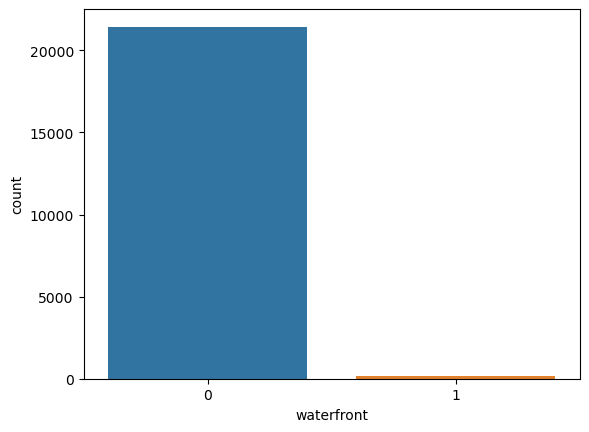

In [20]:
# Construct a count plot for the two scenarios of waterfront
ax = sns.countplot(x="waterfront", data=house)

As we can see, the proportion of houses that are waterfront is significantly small compared to the proportion of houses with no waterfront. Now, we can seperate the dataset into two groups: Group 1 consists of houses with waterfront and Group 2 consists of houses without waterfront 

In [21]:
waterfront0 = house[house['waterfront'] == 0]
waterfront1 = house[house['waterfront'] == 1]
print(waterfront0['price'].describe().round(3))
print(waterfront1['price'].describe().round(3))

count      21437.000
mean      531552.674
std       341602.098
min        75000.000
25%       320000.000
50%       450000.000
75%       639900.000
max      7700000.000
Name: price, dtype: float64
count        163.000
mean     1661876.025
std      1120371.731
min       285000.000
25%       760000.000
50%      1400000.000
75%      2215000.000
max      7062500.000
Name: price, dtype: float64


We can use boxplots to visualize the price of the two groups:

In [2]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=waterfront0)
plt.title('No Waterfront')
plt.subplot(1,2,2)
sns.boxplot(x='price', data=waterfront1)
plt.title('Have Waterfront')

NameError: name 'plt' is not defined

Looking at the two boxplots, we can see the following information about the two groups:
    
**Group 1 (No waterfront):**
- Most house prices fall within 320000 and 639900 
- However, there is many outliers

**Group 2 (Have waterfront):**
- Most house prices fall within 760000 and 2215000
- There are not many outliers 

With these information, we can see that prices of house that do have waterfront are typically higher than houses that do not have waterfront. To examine the distribution of these two groups better, we can use histograms

Text(0.5, 1.0, 'Have Waterfront')

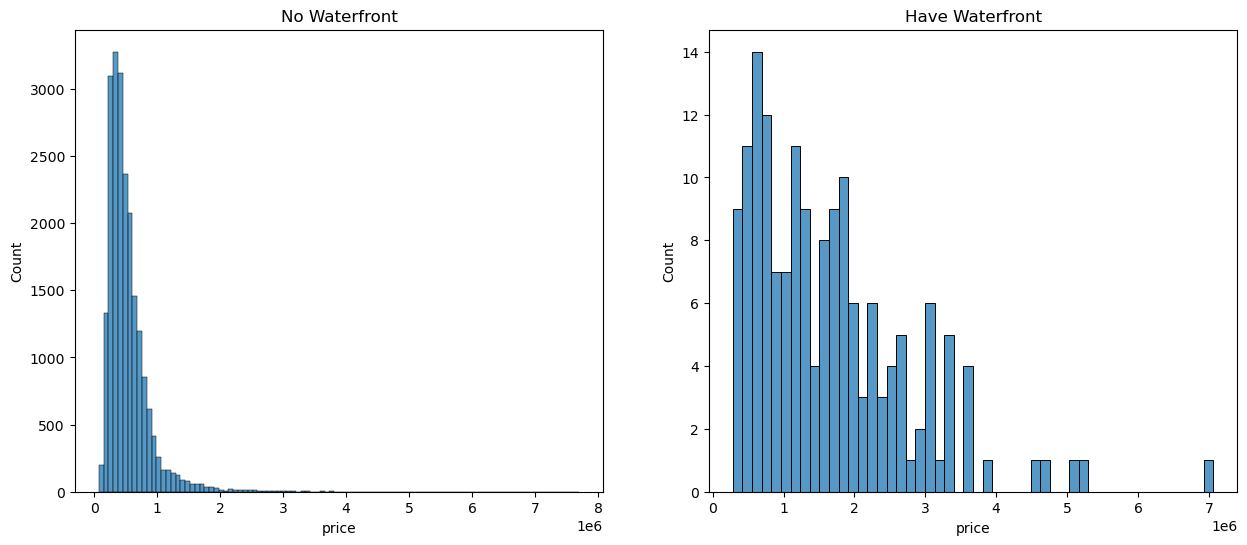

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(x='price', data=waterfront0, bins=100)
plt.title('No Waterfront')
plt.subplot(1,2,2)
sns.histplot(x='price', data=waterfront1, bins=50)
plt.title('Have Waterfront')

With these histograms, we can observe these similarities and differences about the distribution of the two groups:

**Similarities**

As both distributions are skewed to the right (Asymetric):
- The mean prices are larger than the median price, due to high value outliers
- Most observation cluster towards lower prices, but there are some extreme high prices. Hence, with these distribution, we can say that most of the house prices are low, but there are a few houses that have significantly high prices (Outliers)


**Differences**

- Waterfront group has a higher mean (1661876.025) compared to No waterfront group (531552.674). However, there is many outliers in both dataset, so the mean may not be an effective summary statistic
- Waterfront group has a higher median (1400000) compared to No waterfront group (450000). Median is less likely to be affected by outliers
- Waterfront group has a higher standard deviation (1120371.731) compared to No waterfront group (341602.098). Hence, the distribution of Waterfront group has a higher variability



## Question 2

Conduct (with $α = 0.05$) the appropriate t-test, median and Mann-Whitney tests, to
assess whether waterfront house prices are typically higher (the alternative of unequal
prices is fine for the median test). Assess all assumptions made.


### Student's t test

In [24]:
from scipy import stats

In [25]:
stats.ttest_ind(waterfront0['price'], waterfront1['price'], equal_var = False)


TtestResult(statistic=-12.875998525086034, pvalue=1.378018391898827e-26, df=162.22910664622552)

The hypotheses are:
$H_0:$ the two group means are equal: $\mu_{\text{NW}} = \mu_{\text{W}}$. 
$H_1:$ the two group means are not equal: $\mu_{\text{NW}} \neq \mu_{\text{W}}$.  

We choose $\alpha=0.05$ as standard.  

The test stat is $t = -12.88$, which has a Student-t distribution with approximately 162 degrees of freedom, if the null of equality of means is, and the assumptions are also, true. Here, the p-val is $P(|t_{162}| \geq -12.88) = 1.38 \times 10^{-26}$, which is very close to 0. This is $< 0.05$, so we reject the null and conclude that the two group means are significantly different to each other. Therefore, we can say that there is a significant relationship between the house prices and waterfront. In other words, houses that have waterfront tend to have significantly higher prices than houses that does not have waterfront

The test assumed that the data are iid in each group, the two groups are independent of each other and the 4th moment of the house prices in each group is finite. 
1. The 1st assumption relies on house prices independently of each other, which means that house prices are not influencing each other. In this problem, we can assume this is true; however, in reality, house prices can influence each other due to competition. 
2. The 2nd assumption is that prices of waterfront houses do not influence the prices of non-waterfront houses, or vice versa. We also can assume this assumption, although these influences can appear in real life. 
3. The final assumption will be satisfied if house price is a bounded variable. We can see that house prices have a lower bound of 0. Moreover, as each house has finite price, we can also say that house prices are implicitly bounded. Therefore, the 4th moment of house prices would be finite and the 3rd assumption is satisfied. 

### Median Test

In [26]:
from scipy.stats import median_test

In [27]:
median_test(waterfront0['price'], waterfront1['price'], ties = "ignore")

MedianTestResult(statistic=120.40549039211706, pvalue=5.156582160773728e-28, median=450000.0, table=array([[10591,   152],
       [10674,    11]]))

The hypotheses are: 

$H_0: \mbox{median}_{NW} = \mbox{median}_{W}$ vs $H_1: \mbox{median}_{NW} \neq \mbox{median}_{W}$.

We choose $\alpha=0.05$ as standard.  

The test statistic is $120.41$, which under the null follows a $\chi^2_1$ distribution. In this case, the p-value is $P(\chi^2_1 > 120.41) = 5.16 \times 10^{-28}$, which is very close to 0. This is $< 0.05$, so we reject the null and conclude that the two group medians are significantly different to each other. We conclude that there is a significant relationship between the house prices and waterfront.

The assumptions made are: 

1. Independence of the two groups. Again, in this problem, we assume that this is true.

2. Each cell in the contingency table has expected value at least 5. This assumption is met, as all 4 of the values in the contigency table are larger than 5 (10591, 152, 10674, 11).

3. Data are i.i.d. in each group. Again, in this problem, we assume this is true. 

4. Data are at least on the ordinal scale: House price is a numerical variable, so this is satisfied.

### Mann-Whitney U Test

In [28]:
from scipy.stats import mannwhitneyu

In [29]:
mannwhitneyu(waterfront0['price'], waterfront1['price'], alternative='two-sided')

MannwhitneyuResult(statistic=405270.0, pvalue=3.2429468690370975e-64)

The hypotheses are: 

$H_0:$ House prices in group NW has the same distribution as House prices in group W: $P(NW > W) = 0.5$; vs 

$H_1:$ House prices in group NW does not have the same distribution as House prices in group W: $P(NW > W) \neq 0.5$.

We choose $\alpha=0.05$ as standard.  

The test statistic assesses whether there is a difference in the sum of the ranks in each group. Here it is $U = 405270$, which under the null follows a large sample normal distribution. In this case, the p-value is $ 3.24 \times 10^{-64}$, which is the two-sided p-value from a standard normal distribution, where $Z$ is the standardised value of $U$. This is $< 0.05$, thus we can reject the null hypothesis. We conclude that there is a significant difference in the distribution of house prices between the two groups.

The assumptions made are: 
1. Independence of the two groups. Again, we assume this is true

2. Data are i.i.d. in each group. Again, we assume this is true

3. Each group's sample size is large enough for the CLT to work: We only neded at least 8 in each group, so sample sizes is enough here (Group 0: 21437, Group 1: 163)

4. Data are at least on the ordinal scale:  House price is a numerical variable, so this is satisfied.

The value $U=405270$ here takes each value in group NW and counts the number of values in group W that are below it, adding these counts up. Thus, the total number of group W values below group NW values is $U = 405270$.

## Question 3

Which test’s result do you believe the most in Task 2? Discuss and explain.

We can compare the p-values of each test:

P-value list: 

- T-test: $1.3 \times 10^{-26}$
- Median: $5.16 \times 10^{-28}$
- MWU: $3.24 \times 10^{-64}$

In this problem, the t-test is has very low power due to the high amount of outliers in both groups. The median test is valid, however this type of test has very low power. The MWU test is valid and has higher power than the median test. The MWU test also has the lowest p-value, suggesting stronger evidence against the null hypothesis

Therefore, we can conclude that the MWU test is the most valid test.

## Question 4

Conduct an appropriate exploratory analysis to assess whether there may be a linear
relationship between houses’ prices and living area size in square meters

First, we examine the houses' prices and living area in square meters variables

In [30]:
house['price'].describe().round(3)

count      21600.000
mean      540082.429
std       367144.535
min        75000.000
25%       321500.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [31]:
house['sqm_living'].describe().round(3)

count    21600.000
mean       193.232
std         85.322
min         26.942
25%        132.781
50%        177.443
75%        236.901
max       1257.897
Name: sqm_living, dtype: float64

Next, we can use  boxplots to examine the variability and the distribution of the two variables

Text(0.5, 1.0, 'Living Area')

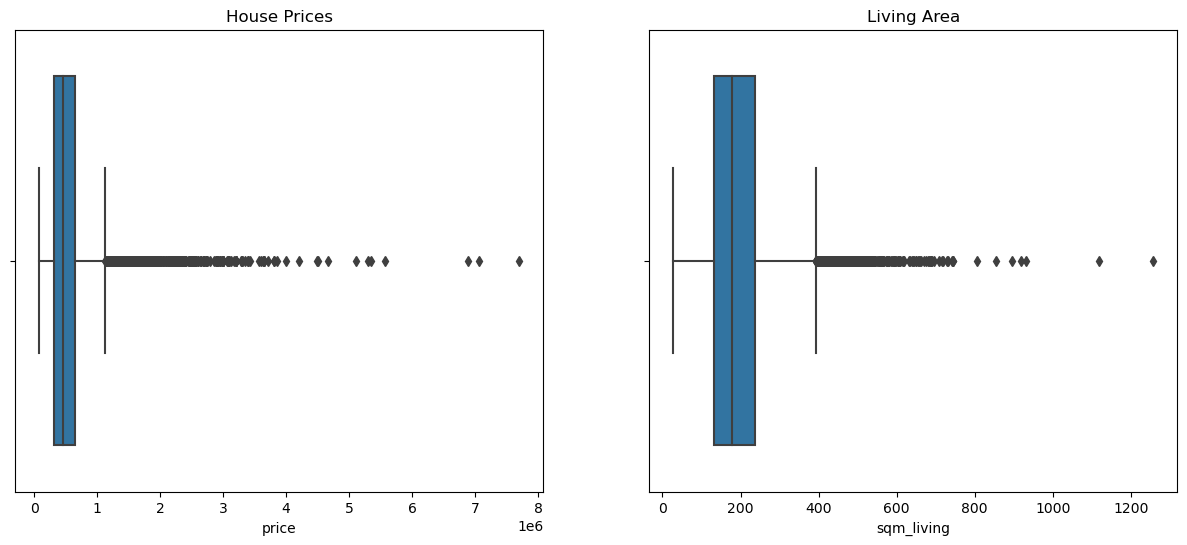

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x='price', data=house)
plt.title('House Prices')
plt.subplot(1,2,2)
sns.boxplot(x='sqm_living', data=house)
plt.title('Living Area')

With these plots, we can see that there are a large number of outliers for both variables

As both of the houses' prices and living area in square meters are numerical variables, we can use a scatter plot to examine the relationship between the two variables

Text(0.5, 1.0, 'Scatter Plot of House Prices and Living Area Square Meters')

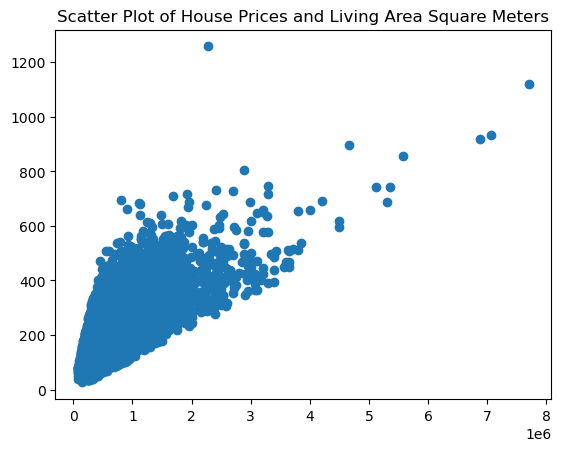

In [34]:
plt.scatter(house['price'],house['sqm_living'])
plt.title("Scatter Plot of House Prices and Living Area Square Meters")

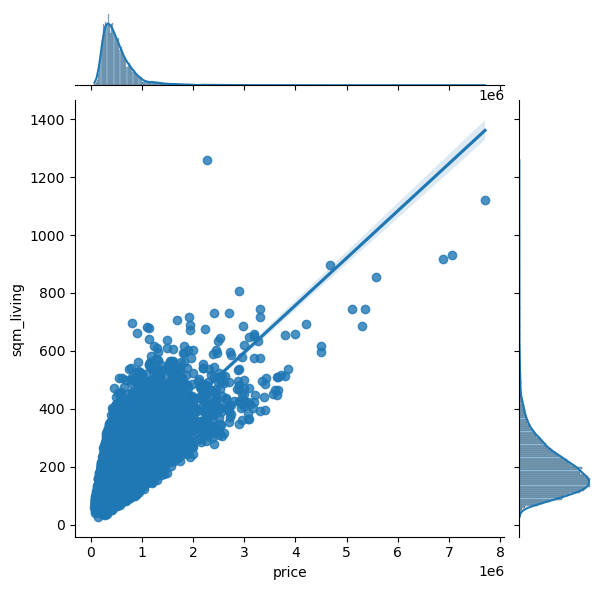

In [35]:
sns.jointplot(x=house['price'], y=house['sqm_living'], kind='reg')


In [36]:
np.corrcoef(house['price'], house['sqm_living'])

array([[1.        , 0.70191473],
       [0.70191473, 1.        ]])

### Conclusion

As we can see from the both graphs, the houses' prices and the living area square meters have a very strong relationship. The large sample size ($21600$) means that the strong correlation of $0.7$ is highly significantly different to 0 ($p-val = 0)$. Therefore, there is a high chance that there is a strong linear relationship between houses' prices and living area square meters. 

## Question 5

Conduct a simple linear regression analysis, first using OLS and then using LAD estimation, for houses’ prices on living area size in square meters. Fully assess all assumptions

### OLS (Ordinary Least Square) Estimation

With the scatterplots in Question 4, we can observe that the variance may not be constant, as the scatterplot have the heteroskedasticity pattern of the graph fan out overtime. Hence, with the OLS estimation, we can fit the model using heteroskedasticity-robust SEs 

In [37]:
import statsmodels.formula.api as smf    
reg = smf.ols(formula='price ~ sqm_living', data=house).fit(cov_type='HC0') #OLS
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     2466.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:10:01   Log-Likelihood:            -3.0009e+05
No. Observations:               21600   AIC:                         6.002e+05
Df Residuals:                   21598   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.355e+04   1.08e+04     -4.031      0.000   -6.47e+04   -2.24e+04
sqm_living  3020.3863     60.825     49.657      0.000    2901.172    3139.601
==============================================================================
Omnibus:                    14824.811   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546032.506
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Result Interpretation

The estimated relationship is: Price = -4.355e+04 + 3020.3863 x Sqm_living. Hence, on average, as the living area square meters increase by 1 meter, the price of a house will increase by 3020.3863 dollars. Both variables' standard errors are small relative to their means

We can create a residual plot before assessing the assumptions:

Text(0.5, 1.0, 'Predictor vs residuals')

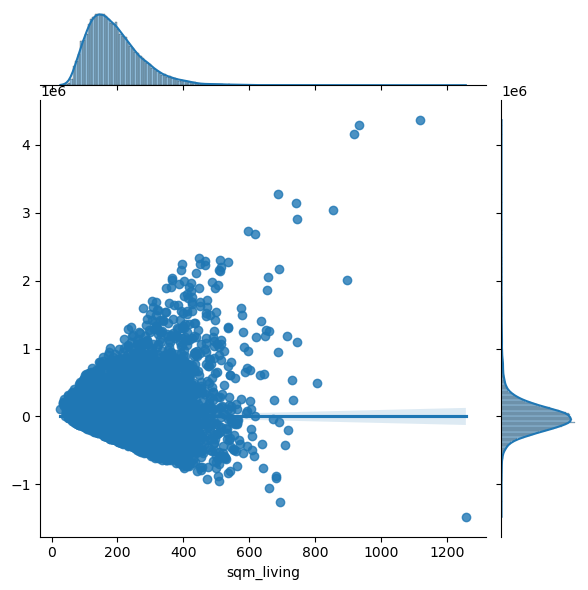

In [40]:
sns.jointplot(x=house['sqm_living'], y=reg.resid, kind='reg')
ax.set_xlabel('Sqm_living')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')

### Assessing Least Square Assumptions (LSA)

1. Linearity: $Y = \beta_0 + \beta_1 X + \varepsilon$ is the true population linear model.

Through the exploratory analysis, we can see that there is a strong positive linear relationship between the two variables houses' prices and living area square meters with a large sample size, so Assumption 1 Linearity is satisfied

2. Exogeneity of $E(\varepsilon | X)$ $=0$

The residual plot suggests that the typical (mean or median) residual is 0, so Assumption 2 Exogeneity is satisfied

3. Independence: The data pairs $Y_i, X_i$ are i.i.d.

Both variables did not display any clear trends in their plots, and are uncorrelated. Therefore, Assumption 3 is satisfied as the data give no strong or clear indication that it is not satisfied.

4. 4th moment of X exists: $E(X^4)$ exists, i.e. is finite $< \infty$.

Through the countplots and boxplots of the two variables, we can observe that there are a large amount of outliers for both variables. Moreover, since prices and square meters are not bounded in any finite interval, this assumption does not seem to be satisfied and seems highly unlikely.

5. Constant error variance: $Var(\varepsilon | X)$ $=$$\sigma^2$

Both the scatterplots and the residual plot suggest that the variance is not constant, as the graph tends to fan out over time. Hence, LSA 5 is not satisfied

Hence, as LSA 4 and 5 are not satisfied, we should use another estimator that is robust to outliers and infinite 4th moments.


### LAD (Least Absolute Deviations) Estimation

Now, we can fit the model using LAD estimator, which is robust to outliers and infinite 4th moments

In [41]:
mod = smf.quantreg('price ~ sqm_living', data=house)
res = mod.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.2480
Model:                       QuantReg   Bandwidth:                   3.152e+04
Method:                 Least Squares   Sparsity:                    4.836e+05
Date:                Thu, 28 Mar 2024   No. Observations:                21600
Time:                        00:35:51   Df Residuals:                    21598
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+04   4072.816     12.972      0.000    4.49e+04    6.08e+04
sqm_living  2332.2000     19.281    120.956      0.000    2294.407    2369.993
==============================================================================
"""

### Results Interpretation

The LAD estimation shows that there is a positive relationship between two variables, with a 1 square meter increase in living area would associate with a 2332.2 dollars increase in the house price on average. The intercept  is relatively small to the houses' prices mean, representing a $5.283*10^4$ house price when the living area square meter is 0 (a house without a living room). 

We can compare the two residual plots of OLS and LAD estimators before assessing the LAD assumptions

Text(0.5, 1.0, 'OLS residuals vs Sqm_living')

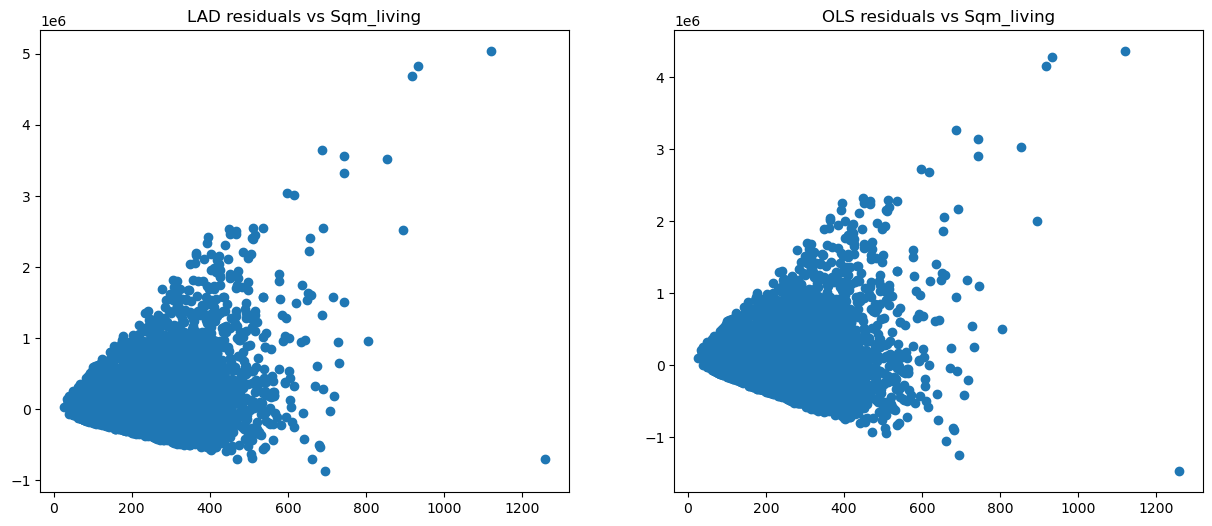

In [44]:
resid1 = reg.resid
resid2 = res.resid
fit1 = reg.fittedvalues
fit2 = res.fittedvalues
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(house['sqm_living'], resid2)
ax1.set_title("LAD residuals vs Sqm_living")
ax2.scatter(house['sqm_living'], resid1)
ax2.set_title("OLS residuals vs Sqm_living")

Text(0.5, 1.0, 'Predictor vs residuals')

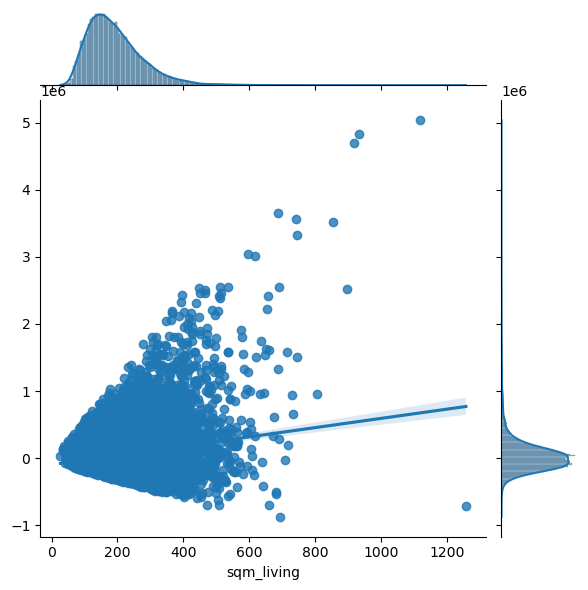

In [45]:
sns.jointplot(x=house['sqm_living'], y=res.resid, kind='reg')
ax.set_xlabel('Sqm_living')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')

### Assessing LAD Assumptions

The residual plots of the OLS and LAD estimator looks identical, both showing a heteroskedasticity pattern representing unconstant variance.

The LAD estimator assumes:

1. Linearity: $Y = \beta_0 + \beta_1 X + \varepsilon$ is the true population linear model.

Through the exploratory analysis, we can see that there is a strong positive linear relationship between the two variables houses' prices and living area square meters with a large sample size, so Assumption 1 Linearity is satisfied

2. The median of $\varepsilon | X$ $=0$


The residual plot suggests that the typical median residual is 0, so Assumption 2 is satisfied


3. Independence: The data pairs $Y_i, X_i$ are i.i.d.

Both variables did not display any clear trends in their plots, and are uncorrelated. Therefore, Assumption 3 is satisfied as the data give no strong or clear indication that it is not satisfied.


4. Continuity of density: $p(Y_i|X_i)$  is a continuous function.

We do not know $p(Y|X)$ here. Therefore, we will simply state that we assume this to be true.


5. 1st absolute moment of Y exists: $E(|Y|)$ exists, i.e. is finite $< \infty$.
6. 2nd moment of X exists: $E(X^2)$ exists, i.e. is finite $< \infty$.

Assumptions 5 and 6 implies that we do not need small amount of outliers, since now 4th moments can be infinite, as even can $E(Y^2)$ and Var$(Y)$. 

In summary, it is more likely that the data satisfy the LAD assumptions than the OLS LSA.

## Question 5

Write a brief (e.g. 0.5 page) report summarising and discussing your findings and conclusions. Include a discussion of whether you would recommend opening a waterfront area office in view of increasing real estate sales based on your findings.

This report focusing on summarizing the findings and conclusions of Task 1's questions, including the relationship between house prices and living area size in square meters and whether waterfront properties tend to have higher prices.

### Key Findings

**Relationship between waterfront and house prices**

Three different tests were conducted to assess the significance of the relationship between waterfront and house prices: Student's t-test, median test, and Mann-Whitney U test. All tests indicated strong evidence against the null hypothesis, suggesting that waterfront properties indeed have higher prices.


**Relationship between house prices and living area size in square meters**

The exploratory analysis revealed a strong positive linear relationship between house prices and living area size, with a correlation coefficient of approximately 0.70. 

Two types of simple linear regression were performed: OLS (Ordinary Least Squares) and LAD (Least Absolute Deviations) estimation. While OLS estimation provided an estimated relationship between house prices and living area size, the LAD estimation was chosen due to its robustness to outliers and infinite 4th moments. The LAD estimation also provided evidence of a positive relationship between the two variables.

The assumptions of both OLS and LAD estimators were thoroughly assessed. While OLS assumptions were not fully satisfied due to heteroskedasticity and unbounded 4th moments, the LAD assumptions appeared to be more plausible.

### Conclusions

In conclusion, this analysis provides valuable insights into the factors influencing house prices and suggests actionable recommendations for real estate business strategies. Based on the findings, it is recommended to consider opening a waterfront area office to capitalize on the higher prices associated with waterfront properties. The analysis suggests a significant relationship between waterfront and house prices, indicating potential opportunities for increased real estate sales in waterfront areas.


# Task 2


## Question 1 
Is the mean of the estimated residuals from your OLS regression still equal 0, i.e.
$\bar{e} = 0$? How does your answer relate to LSA 2? 

The 2nd equation to give the OLS estimates in a model having the intercept $b_0$ is 

$$
\sum_{i=1}^n X_i(Y_i - b_0 - b_1 X_i) = \sum_{i=1}^n X_ie_i = 0
$$

In a simple linear regression without the intercept term, the model equation becomes:

$$
Y_i = \beta_1 X_i + \varepsilon_i
$$

When we estimate this model using ordinary least squares (OLS) regression, we minimize the sum of squared residuals:

$$
RSS = \sum_{i=1}^n (Y_i - b_1 X_i)^2
$$

Differentiating the residual sum of squares with respect to $b_1$, we have:

$\frac{d RSS}{d b_1} = -2\sum_{i=1}^n X_i (Y_i - b_1 X_i)$


Hence, the first order conditions of the OLS estimator are therefore:
$\sum_{i=1}^n X_i(Y_i - \hat{\beta_1} X_i)$ to be equal to 0.

However, as we have $\sum_{i=1}^n X_i(Y_i - \hat{\beta_0} - \hat{\beta_1} X_i) = 0$, the omitted intercept cause $\sum_{i=1}^n X_i(Y_i - \hat{\beta_1} X_i)$ $\neq 0$, meaning that $\sum_{i=1}^n e_i$ $\neq 0$ if the intercept $b_0$ $\neq 0$. Therefore, the mean of the estimated errors ($\bar{e}$) will not guarantee to be 0.

LSA 2 says that $E(\varepsilon | X) = 0$. This relates to LSA 2 by illustrating the importance of including the intercept term in a regression model. Omitting the intercept cause $E(\varepsilon | X)$ $\neq 0$, leading to failing to satisfy the LSA 2 and biased estimators. Therefore, it's essential to include the intercept term in most regression analyses to ensure accurate estimation and interpretation of the model parameters.

### Question 2

Is the correlation between the estimated residuals and the observed x’s still equal 0

The 2nd equation to give the OLS estimates is $\sum_{i=1}^n X_i(Y_i - \hat{\beta_0} - \hat{\beta_1} X_i) = \sum_{i=1}^n X_ie_i = 0$. 

As we don't have the intercept in the regression, this equation become: 
$\sum_{i=1}^n X_i(Y_i - \hat{\beta_1} X_i) = \sum_{i=1}^n X_ie_i$

In question 1, we proved that $\sum_{i=1}^n e_i$ $\neq$ 0. Hence, $\sum_{i=1}^n X_ie_i$ $\neq$ 0

To estimate the correlation between x and e, we use: Corr$(x,e) = \frac{\mbox{Cov}(X,e)}{\sqrt{V(x)V(e)}}$ where 
$\mbox{Cov}(X,e) = E[(x-E(x))(e-E(e))]$. 

The covariance part is estimated from the sample by $\mbox{Cov}(X,e) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(e_i -\bar{e})$. 

Now, we examine if the following equation can be equal to 0:

$\sum_{i=1}^n (x_i - \bar{X})(e_i -\bar{e})$

$ = \sum_{i=1}^n (X_ie_i) + \sum_{i=1}^n (X_i\bar{e}) - \sum_{i=1}^n (\bar{X}e_i) + \bar{X}\bar{e}$


Without the intercept, $\bar{X} \bar{e}$ and $\sum_{i=1}^n X_ie_i$ is not guarantee to be 0. Thus, the covariance between X and e may not necessarily be 0.

Therefore, the estimated correlation between x and e is: Corr$(X,e) = \frac{\mbox{Cov}(X,e)}{\sqrt{V(X)V(e)}}$ does not guarantee to be 0. This cause the Exogeneity assumption LSA 2 to fail. 

### Question 3

What form does the OLS estimator of the slope coefficient in your regression have?

The 2nd equation to give the OLS estimates is $\sum_{i=1}^n X_i(Y_i - \hat{\beta_0} - \hat{\beta_1} X_i) = 0$. 

Rearranging this, we have: 

$\sum X_i Y_i = \hat{\beta_0} \sum X_i + \hat{\beta_1} \sum Y_i^2$

As we don't have the intercept in the regression, this equation become: 

$\hat{\beta_1}\sum_{i=1}^n X_i^2 = \sum_{i=1}^n X_i Y_i$ 

$=> \hat{\beta_1} = \frac{\sum_{i=1}^n X_i Y_i}{\sum_{i=1}^n X_i^2}$

Hence, the form of the OLS estimator of the slope coefficient is:

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n X_i Y_i}{\sum_{i=1}^n X_i^2}
$$

### Question 4

Show whether or not the OLS estimator of your regression is still an unbiased
estimator of the true $\beta_1$.

From Question 2, we have:

$$
\hat{\beta_1} = \frac{\sum_{i=1}^n X_i Y_i}{\sum_{i=1}^n X_i^2}
$$

Let $a_i = \frac{X_i}{\sum_{i=1}^n X_i^2}$

Thus, $\hat{\beta_1} = \sum_{i=1}^n a_i Y_i$ is a linear combination of i.i.d. random variables

With our regression without the intercept $\beta_0$: $Y_1 = \beta_1 X_i + \varepsilon_i$, we can plug in $Y_i$ in $\sum_{i=1}^n a_i Y_i$:

$\hat{\beta_1} = \beta_1 \sum_{i=1}^n a_i X_i + \sum_{i=1}^n a_i \varepsilon_i$

Here, $\sum_{i=1}^n a_i X_i$ is not guaranteed to be 1, so we can not eliminate this expression. 

Hence, we have:
$E(\beta_1 | X) = \beta_1 \sum_{i=1}^n a_i X_i + \sum_{i=1}^n a_i E(\varepsilon_i | X_i)$ 

However, as LSA 2 is not satisfied due to the omitted intercept, $E(\varepsilon | X)$ $\neq 0$. This implies that $E(\beta_1 | X) \neq \beta_1$.

Therefore, we can conclude that $\beta_1$ is no longer an unbiased estimator of $\beta_1$ with the omitted intercept in the regression